In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix

# Set the display option for better visualization
pd.set_option('display.max_columns', None)

import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
print(train_data.head())


   sepal_length  sepal_width  petal_length  petal_width          species
0           5.0          3.6           1.4          0.2      Iris-setosa
1           4.3          3.0           1.1          0.1      Iris-setosa
2           6.4          3.1           5.5          1.8   Iris-virginica
3           5.9          3.0           5.1          1.8   Iris-virginica
4           5.0          2.0           3.5          1.0  Iris-versicolor


In [3]:
# Separate features and target variable
X_train = train_data.drop(columns=['species'])  # Assuming 'species' is the target variable
y_train = train_data['species']

X_test = test_data.drop(columns=['species'])  # Assuming 'species' is the target variable
y_test = test_data['species']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled features
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


   sepal_length  sepal_width  petal_length  petal_width
0     -1.030292     1.232902     -1.343261    -1.303367
1     -1.866471    -0.138454     -1.513556    -1.434460
2      0.642066     0.090105      0.984112     0.794121
3      0.044795    -0.138454      0.757051     0.794121
4     -1.030292    -2.424047     -0.151192    -0.254623


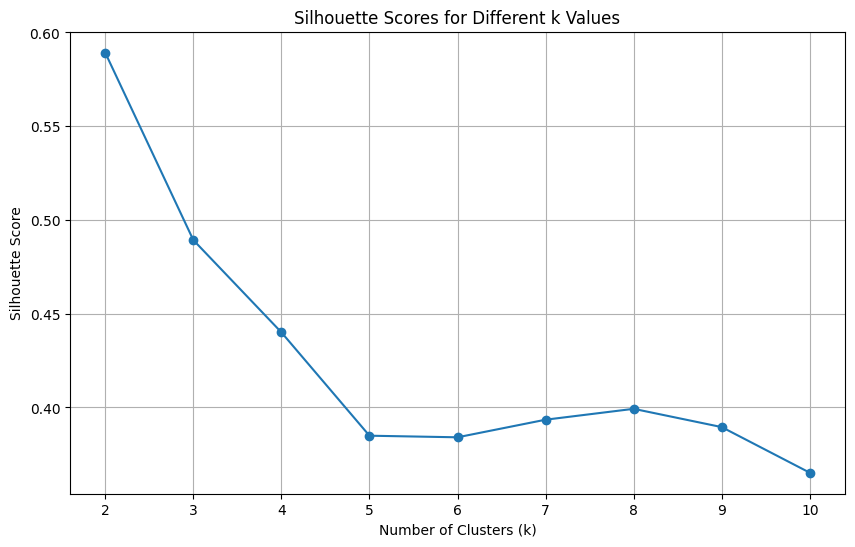

Optimal number of clusters: 2


In [4]:
# Finding the optimal number of clusters using the silhouette method
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    try:
        kmeans = KMeans(n_clusters=k, init='random', random_state=42)
        labels = kmeans.fit_predict(X_train_scaled)
        score = silhouette_score(X_train_scaled, labels)
        silhouette_scores.append(score)
    except Exception as e:
        print(f"Error occurred for k={k}: {e}")
        silhouette_scores.append(None)  # Append None if there was an error

# Continue with your plotting and finding optimal k as before...

# Remove None values from silhouette_scores for processing
valid_scores = [score for score in silhouette_scores if score is not None]

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Finding the optimal k without errors
if valid_scores:
    best_k_index = np.argmax(valid_scores)  # Get index of max score, ignoring None
    optimal_k = k_values[silhouette_scores.index(valid_scores[best_k_index])]
    print(f'Optimal number of clusters: {optimal_k}')
else:
    print("No valid silhouette scores were computed.")


In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Scale the data (if necessary)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try KMeans with a simple loop
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    try:
        kmeans = KMeans(n_clusters=k, init='random', random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        # For synthetic data, you can calculate the silhouette score
        from sklearn.metrics import silhouette_score
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
        print(f"k={k}, silhouette score={score}")
    except Exception as e:
        print(f"Error occurred for k={k}: {e}")
        silhouette_scores.append(None)  # Append None if there was an error


k=2, silhouette score=0.5464238687265818
k=3, silhouette score=0.6376874711002073
k=4, silhouette score=0.5284956975388039
k=5, silhouette score=0.41110446442423004
k=6, silhouette score=0.3448331922530929
k=7, silhouette score=0.355057526313862
k=8, silhouette score=0.37167495732343186
k=9, silhouette score=0.36239420002822087
k=10, silhouette score=0.34127344399323084


In [6]:
# Choose the best k based on the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train_labels = kmeans.fit_predict(X_train_scaled)

# Add the cluster labels to the original training dataframe
train_data['Cluster'] = train_labels

# Show the first few rows of the clustered training dataset
print(train_data.head())


Optimal number of clusters: 3
   sepal_length  sepal_width  petal_length  petal_width          species  \
0           5.0          3.6           1.4          0.2      Iris-setosa   
1           4.3          3.0           1.1          0.1      Iris-setosa   
2           6.4          3.1           5.5          1.8   Iris-virginica   
3           5.9          3.0           5.1          1.8   Iris-virginica   
4           5.0          2.0           3.5          1.0  Iris-versicolor   

   Cluster  
0        1  
1        1  
2        2  
3        0  
4        0  


In [7]:
# Predict clusters on the test data
test_labels = kmeans.predict(X_test_scaled)

# Add the cluster labels to the test dataframe
test_data['Cluster'] = test_labels

# Display the test data with clusters
print(test_data.head())


   sepal_length  sepal_width  petal_length  petal_width          species  \
0           4.4          3.2           1.3          0.2      Iris-setosa   
1           6.3          3.3           4.7          1.6  Iris-versicolor   
2           5.7          2.8           4.1          1.3  Iris-versicolor   
3           5.5          2.3           4.0          1.3  Iris-versicolor   
4           4.4          3.0           1.3          0.2      Iris-setosa   

   Cluster  
0        1  
1        2  
2        0  
3        0  
4        1  


Confusion Matrix:
 [[12  0  0]
 [ 0  9  4]
 [ 0  5  8]]


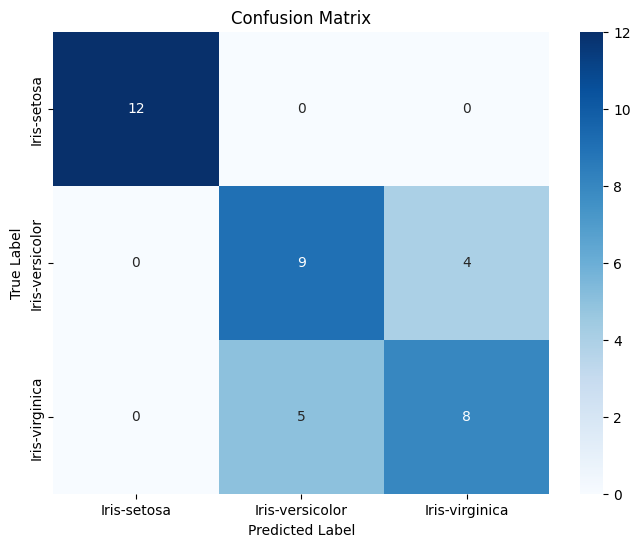

In [8]:
# Creating a mapping from clusters to species
def map_clusters_to_species(train_data, cluster_labels):
    # Add cluster labels to training data
    train_data['Cluster'] = cluster_labels
    
    # Map clusters to the most common species in each cluster
    cluster_species_map = {}
    for cluster in np.unique(cluster_labels):
        most_common_species = train_data[train_data['Cluster'] == cluster]['species'].mode()[0]
        cluster_species_map[cluster] = most_common_species
    return cluster_species_map

# Map cluster labels to species
cluster_species_mapping = map_clusters_to_species(train_data, train_labels)

# Map test labels to species using the cluster mapping
mapped_test_labels = [cluster_species_mapping[label] for label in test_labels]

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, mapped_test_labels)
print("Confusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
